# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

*NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!*

*NOTE: if you want to use the same trained neural network model of this notebook, you can load it from the "cl_project_model.h5" file.*

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [65]:
import pandas as pd

In [66]:
data_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')

In [67]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [68]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [69]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
sns.set_theme()
%matplotlib inline

In [71]:
df = pd.read_csv('data/lending_club_loan_two.csv')

Brief look at the data and its main stats:

In [72]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Section 1: Exploratory Data Analysis

For a kickstart of our EDA, let's plot a countplot of the target features: the loan status.

<Axes: xlabel='loan_status', ylabel='count'>

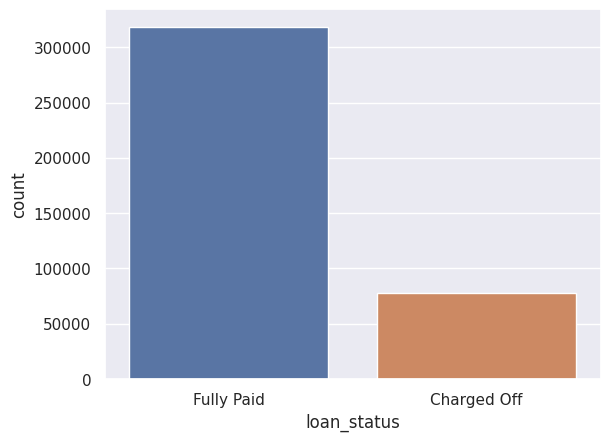

In [75]:
sns.countplot(data=df, x='loan_status')

Recalling that our final goal is a classification task (we will train Neural Network to predict if a borrower will fully paid back a loan), what we can say for first is that we have a pretty imbalanced target feature. The historical data shows (luckily) that most of the loans done in LendingClub were fully paid back.

But now, talking about loans, the next important thing is getting an idea of the listed amount of the loan applied for by the borrower. We will use an histogram for this task.

In [76]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='loan_amnt', ylabel='Count'>

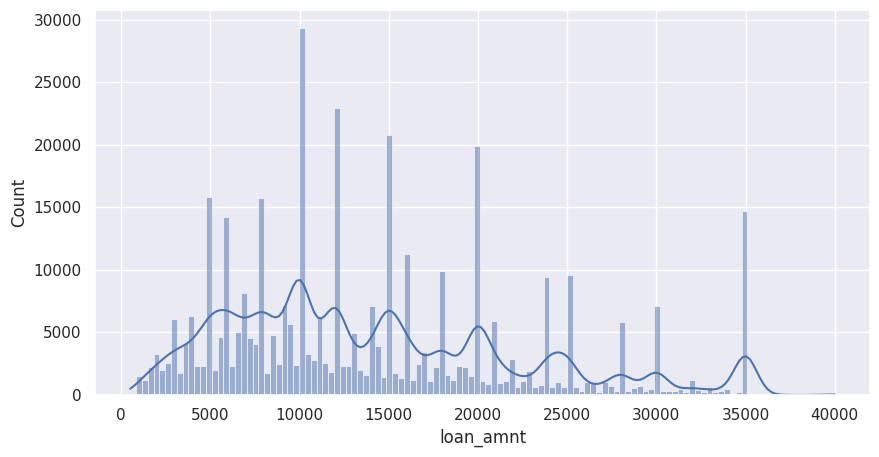

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='loan_amnt', kde=True)

As we can clearly see we will deal to a non-normally distributed data, maybe a multimodal distributed one (we have multiple peak).

Now, let's explore correlation between the continuous feature variables. We calculate the correlation between all continuous numeric variables using .corr() method.

In [78]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


We'll visualize the correlation matrix with a heatmap, for having a grasp of the features correlations.

In [79]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<Axes: >

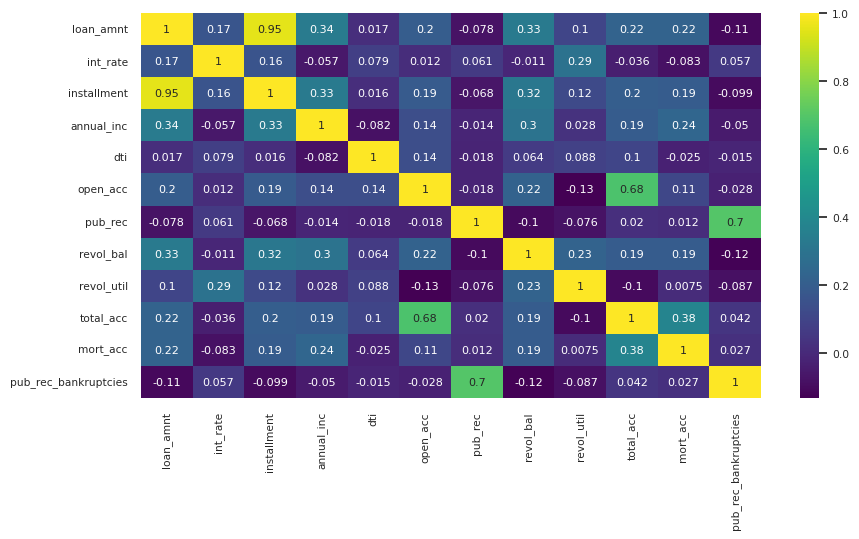

In [80]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True, annot_kws={"fontsize":8})

The most highlighted correlation is the 0.95 between the **load_amnt** and the **installment** features! An since we can expect a higher monthly payment for higher amount of the loan applied for by the borrower, the high positive correlation make sense.

Another correlation worth to mention is the 0.7 between the **pub_rec** (Number of derogatory public records) and the **pub_rec_bankruptcies** (Number of public record bankruptcies).

But right now, let's focus more on our highest correlation. We start by printing the original descriptions of the **load_amnt** and the **installment** features, just to pin them:

In [81]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [82]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Now let's plot the 2 features with the plot that can best represent their high correlation: a scatterplot.

<Axes: xlabel='installment', ylabel='loan_amnt'>

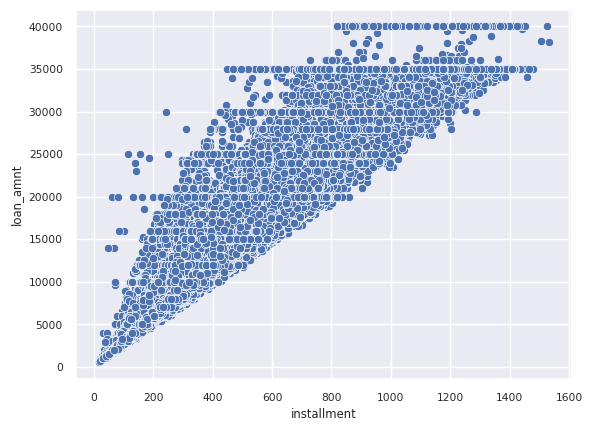

In [83]:
sns.scatterplot(df, x='installment', y='loan_amnt')

The exact straight line that we can expect from a 0.95 correlation.

Let's move on better explore the relations between the features and the target label. We will plot a boxplot showing the relationship between the loan_status and the Loan Amount.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

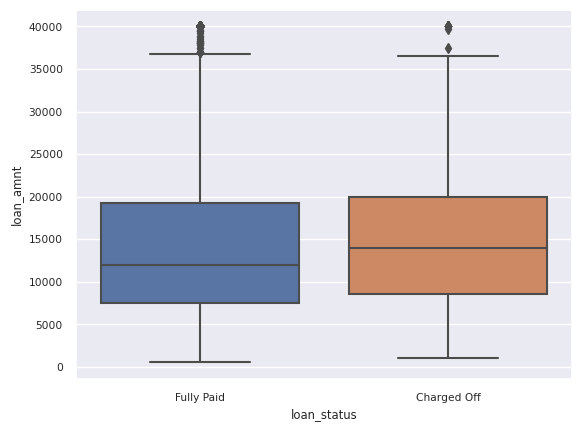

In [84]:
sns.boxplot(df, x='loan_status', y='loan_amnt')

All pretty balanced. The only thing we could think of is higher loan amount with the "charged off" value, since It could be possible that borrowers does not fully pay back their loan for high charge. But, as we can see, overall that's not the case.

Seems that the loan amount will be one of the most precious feature though. Now we will summarize the main statistics points of **loan_amnt**, grouped by **loan_status**. 

In [85]:
loan_amnt_by_loan_status = df[['loan_status', 'loan_amnt']].groupby(['loan_status'])
loan_amnt_by_loan_status.describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

Let's now move on other 2 features that could be determinant in predicting if a person actually end up paying back their loan: the *grades* and *subgrades* assigned to the customers, according to the LendingClub system.

First of all, What are the unique possible grades and subgrades? Let's find out:

In [86]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [87]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


Let's move on the important insights now: a countplot to see the number of grades for each unique value, based on the loan status.

<Axes: xlabel='grade', ylabel='count'>

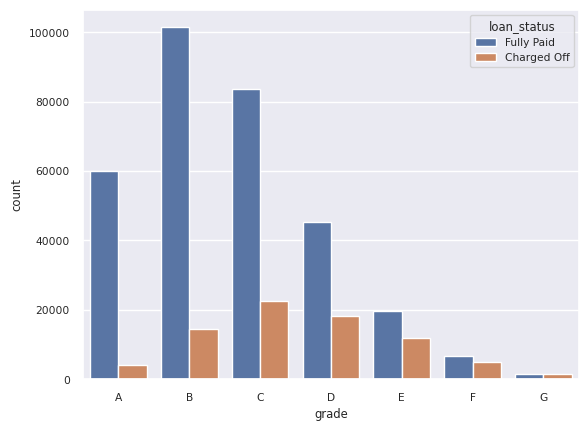

In [88]:
grades = df['grade'].unique()
grades.sort()
sns.countplot(df, x='grade', hue='loan_status', order=grades)

A higher number of grades in higher grades values for customers that fully pay back their loans. As we should expect.

Now we will perform a similar task for the subgrades. This starting from a general countplot and see the subgrade distribution...

<Axes: xlabel='sub_grade', ylabel='count'>

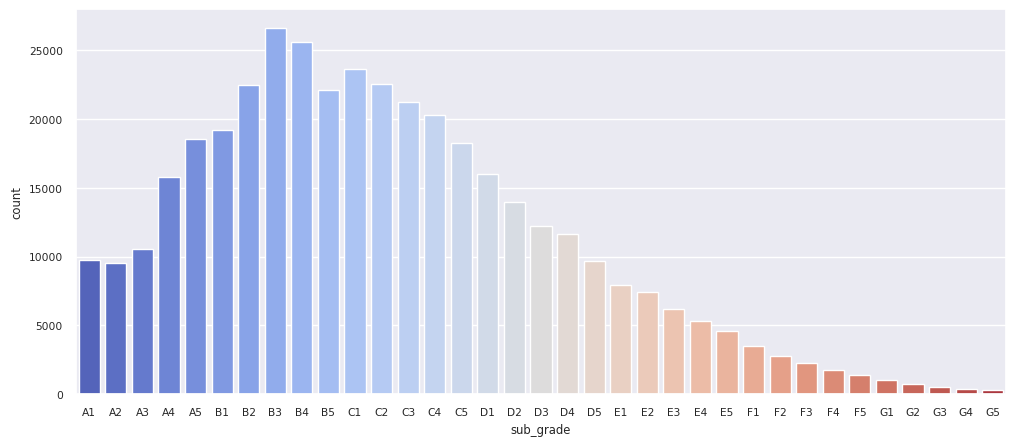

In [89]:
plt.figure(figsize=(12, 5))
sns.countplot(df, x='sub_grade', order=sorted(df['sub_grade'].unique()), palette='coolwarm')

...to plot the same information but divided per loan status.

<Axes: xlabel='sub_grade', ylabel='count'>

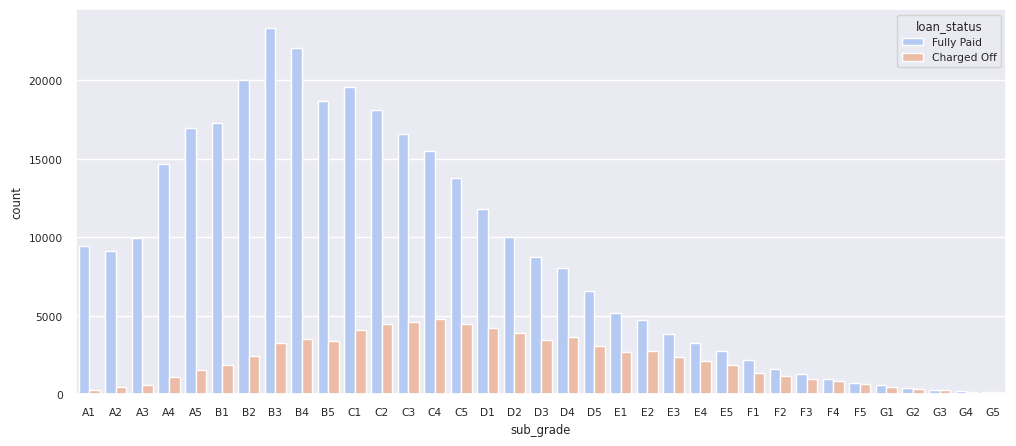

In [90]:
plt.figure(figsize=(12, 5))
sns.countplot(df, x='sub_grade', order=sorted(df['sub_grade'].unique()), palette='coolwarm', hue='loan_status')

The sub grade histogram confirm what we already noticed in the grade histogram: lower don't get paid back that often (in the case of the immediately above plot, F and G subgrades).

To have a clearer visualization, we'll isolate F and G subgrades in another histogram:

<Axes: xlabel='sub_grade', ylabel='count'>

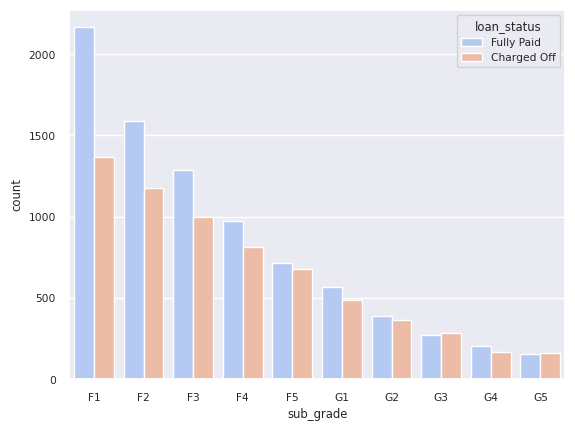

In [91]:
f_g_sub_grades = list(filter(lambda x: x[0] in ['F', 'G'], sorted(df['sub_grade'].unique())))
sns.countplot(df, x='sub_grade', order=f_g_sub_grades, palette='coolwarm', hue='loan_status')

Moving along, we'll perform a task to simplify the comprehension of the target label from a Dataframe point of view. I'm talking abount creating a new column called **loan_repaid**, which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [92]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [93]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


To summarize: what are the correlations between whether the loan was repaid or not (**loan_repaid**) and all the other dataset numerical features?

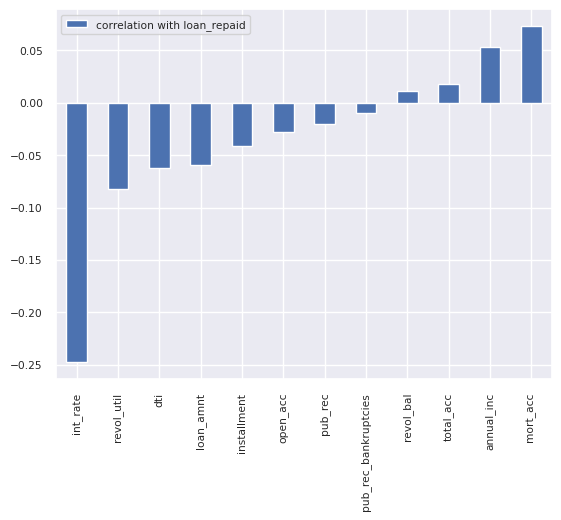

In [94]:
df.corr(numeric_only=True).drop('loan_repaid', axis=0).sort_values(by=['loan_repaid']).plot.bar(y='loan_repaid')
plt.legend(['correlation with loan_repaid'])

## Section 2: Data PreProcessing

In this section we prepare our data to be fitted into a neural network. In particular the section goals are:
- remove/fill missing data
- remove unnecessary or repetitive features
- convert categorical string features to dummy variables.

Before we start, let's see again our dataset head:

In [95]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.
To have a kickstart, let's quickly see the length of the Dataframe.

In [96]:
len(df)

396030

And this, followed by the number of missing values per feature and missing values rate:

In [97]:
def missing_values_info(df):
  nan_info = pd.concat({
      'total_missing_values': df.isnull().sum(),
      'missing_values_rate': df.isnull().sum().apply(lambda x: x/len(df))
    },axis=1).query('total_missing_values > 0')
  
  return nan_info if len(nan_info) > 0 else 'No null value present.'

In [98]:
missing_values_info(df)

,total_missing_values,missing_values_rate
emp_title,22927,0.057892
emp_length,18301,0.046211
title,1755,0.004431
revol_util,276,0.000697
mort_acc,37795,0.095435
pub_rec_bankruptcies,535,0.001351


Let's take in account the first 2 columns with missing data: **emp_title** and **emp_length**. Before any analysis we print what the 2 columns describe:

In [99]:
print('**emp_title**: ')
feat_info('emp_title')

print('\n**emp_length**: ')
feat_info('emp_length')

**emp_title**: 
The job title supplied by the Borrower when applying for the loan.*

**emp_length**: 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [100]:
df['emp_title'].nunique()

173105

And how they are distributed?

In [101]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. And, in addtion to its null-entries fact, we can remove that **emp_title** column.

In [102]:
dfp = df.drop('emp_title', axis=1)

Let's do the same thing with the **emp_length** feature column.

In [103]:
print('emp_length unique values:', dfp['emp_length'].nunique())
dfp['emp_length'].value_counts()

emp_length unique values: 11


10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

Well, definetly a more more manageable situation with unique values! And, among other things, It's also a categorical feature with ordinal values.

Since It's a feature worth considering let's plot a count plot, with the unique values sorted by employment length in years (what the column describes after all).

<Axes: xlabel='emp_length', ylabel='count'>

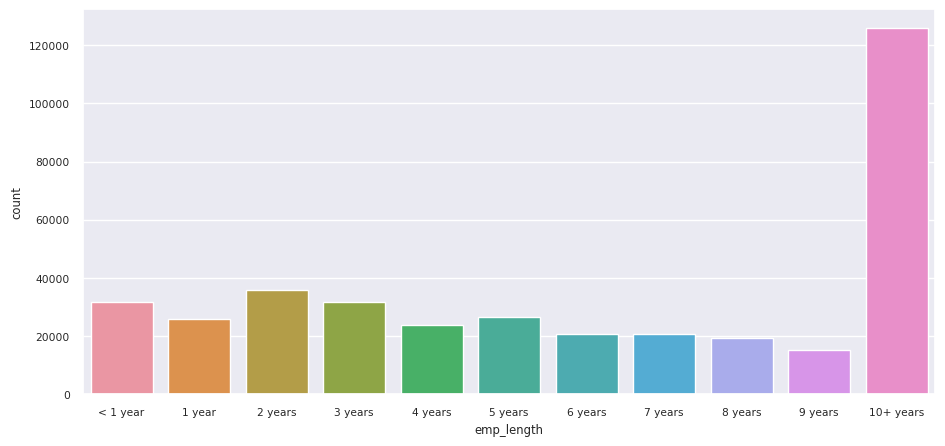

In [104]:
emp_length_dict = {
  '< 1 year': 0,
  '1 year': 1,
  '2 years': 2,
  '3 years': 3,
  '4 years': 4,
  '5 years': 5,
  '6 years': 6,
  '7 years': 7,
  '8 years': 8,
  '9 years': 9,
  '10+ years': 10,
}
plt.figure(figsize=(11, 5))
sns.countplot(dfp, x='emp_length', order=sorted(dfp['emp_length'].value_counts().index, key=lambda x: emp_length_dict[str(x)]))

Let's see the count also grouped by **loan_status**:

<Axes: xlabel='emp_length', ylabel='count'>

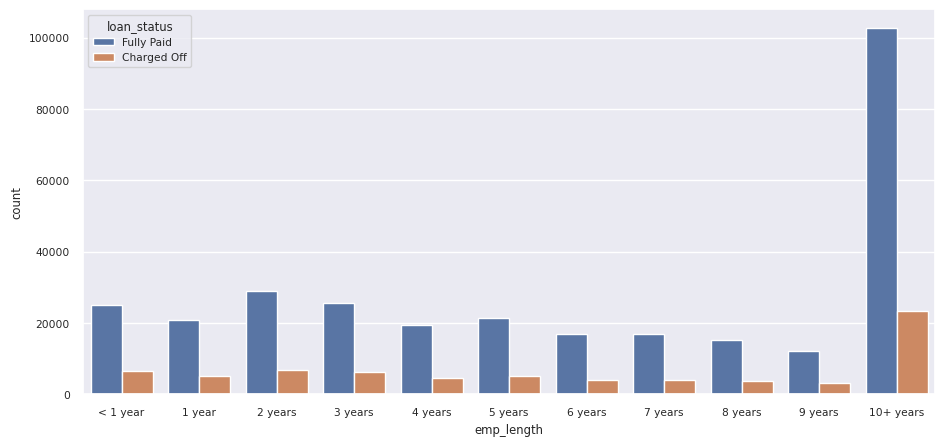

In [105]:
plt.figure(figsize=(11, 5))
sns.countplot(dfp, x='emp_length', order=sorted(dfp['emp_length'].value_counts().index, key=lambda x: emp_length_dict[str(x)]), hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. Let's compute this information, and then visualize it with a barplot to notice any variation among the employments lengths.

<Axes: xlabel='emp_length'>

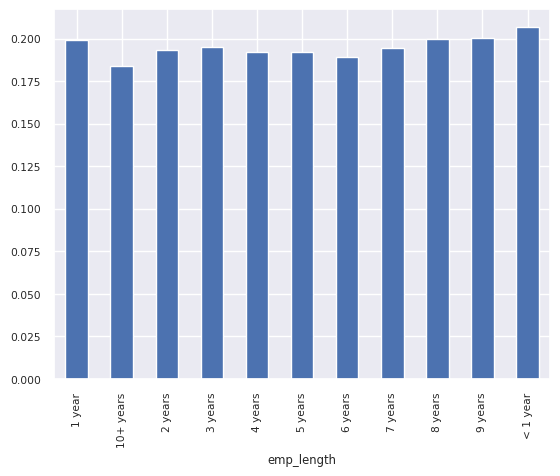

In [106]:
(dfp[dfp['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status'] / dfp.groupby('emp_length').count()['loan_status']).plot.bar()

Charge off rates are extremely similar across all employment lengths. Let's go ahead and drop the emp_length column.

In [107]:
dfp.drop('emp_length', inplace=True, axis=1)

So, where were we with missing values? Let's revisit the DataFrame to see what feature columns still have missing data.

In [108]:
missing_values_info(dfp)

,total_missing_values,missing_values_rate
title,1755,0.004431
revol_util,276,0.000697
mort_acc,37795,0.095435
pub_rec_bankruptcies,535,0.001351


The next one is **title**. To analyze it, let's review the **title** column vs the **purpose** column. Is this repeated information?

In [109]:
dfp[['title', 'purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


The **title** column is simply a string subcategory/description of the **purpose** column. So, we go ahead and drop also the **title** column.

In [110]:
dfp.drop('title', axis=1, inplace=True)

Let's now see the **mort_acc** feature. For first, we have to see whay the column itself represent:

In [111]:
feat_info('mort_acc')

Number of mortgage accounts.


And this, followed by the counts of every unique value.

In [112]:
dfp['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to **mort_acc**:

In [113]:
dfp.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the **total_acc** feature correlates with the **mort_acc**, and given the **total_acc** description:

In [114]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


Looks like the correlation makes sense! 

Given this information, let's try the following fillna() approach. We will group the dataframe by the **total_acc** and calculate the mean value for the **mort_acc** per **total_acc** entry. To get the result below:

In [115]:
mean_mort_acc_by_total_acc = dfp[['mort_acc', 'total_acc']].groupby('total_acc').mean()['mort_acc']
print('Mean of mort_acc column per total_acc')
mean_mort_acc_by_total_acc

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [116]:
dfp['mort_acc'] = dfp.apply(lambda x: mean_mort_acc_by_total_acc[x['total_acc']] if np.isnan(x['mort_acc']) else x['mort_acc'], axis=1)

Let's just see if this method works: we compute the number of null values of **mort_acc**:

In [117]:
dfp['mort_acc'].isnull().sum()

0

Nice! We remove all **mort_acc** null occurrences, which was roughly the 9% of the total.

Well, now as usual we print the current situation with the remaining null values in other columns.

In [118]:
missing_values_info(dfp)

,total_missing_values,missing_values_rate
revol_util,276,0.000697
pub_rec_bankruptcies,535,0.001351


revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Let's go ahead and remove the rows that are missing those values in those columns with dropna().

In [119]:
dfp.dropna(inplace=True)

In [120]:
missing_values_info(dfp)

'No null value present.'

We're done working with the missing data!

### Categorical Variables and Dummy Variables

The next important step in data preprocessing is dealing with the string values due to the categorical columns.

But, needless to say, let's see all the columns that are currently non-numeric and their informations for first.

In [121]:
def cat_features(df):
  return df.select_dtypes('object')

In [122]:
cat_features(dfp).describe().T

,count,unique,top,freq
term,395219,2,36 months,301247
grade,395219,7,B,115812
sub_grade,395219,35,B3,26611
home_ownership,395219,6,MORTGAGE,198022
verification_status,395219,3,Verified,139451
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
purpose,395219,14,debt_consolidation,234169
earliest_cr_line,395219,684,Oct-2000,3013
initial_list_status,395219,2,f,237346


Let's now go through all the string features to see what we should do with them.

#### term feature

In [123]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


As we can see in the table above, **term** has 2 unique values. We convert the **term** feature into either a 36 or 60 integer numeric data type.

In [124]:
dfp['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [125]:
dfp['term'] = dfp['term'].apply(lambda x: int(x[:3]))

In [126]:
dfp['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

#### grade feature

We already know **grade** is part of **sub_grade**, so just drop the **grade** feature.

In [127]:
dfp.drop('grade', inplace=True, axis=1)

Let's convert the **subgrade** feature instead into dummy variables.

In [64]:
dfpc = pd.concat([dfp, pd.get_dummies(dfp['sub_grade'], drop_first=True)], axis=1).drop('sub_grade', axis=1)

In [177]:
dfpc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [178]:
dfpc.head(5)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


Now, back to the remaining categorical columns:

In [179]:
cat_features(dfpc).describe().T

,count,unique,top,freq
home_ownership,395219,6,MORTGAGE,198022
verification_status,395219,3,Verified,139451
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
purpose,395219,14,debt_consolidation,234169
earliest_cr_line,395219,684,Oct-2000,3013
initial_list_status,395219,2,f,237346
application_type,395219,3,INDIVIDUAL,394508
address,395219,392898,USCGC Smith\nFPO AE 70466,8


#### verification_status, application_type, initial_list_status, purpose

 As we did with the previous category variable, we convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.

In [180]:
dfpc = pd.concat([dfpc, pd.get_dummies(dfpc[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)], axis=1)
dfpc.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)

In [181]:
dfpc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [182]:
dfpc.head(5)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [183]:
cat_features(dfpc).describe().T

,count,unique,top,freq
home_ownership,395219,6,MORTGAGE,198022
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
earliest_cr_line,395219,684,Oct-2000,3013
address,395219,392898,USCGC Smith\nFPO AE 70466,8


#### home_ownership

Before apply any changes to this feature, let's review its values first.

In [184]:
dfpc['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Yes, we are in another case where we'll convert this categorical feature into a dummy variable. But before that we will replace the *NONE* and *ANY* categories with the *OTHER* category, so that we end up with just 4 categories, *MORTGAGE*, *RENT*, *OWN*, *OTHER*.

In [185]:
dfpc['home_ownership'].replace(to_replace=['NONE', 'ANY'], value='OTHER', inplace=True)
dfpc['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [186]:
dfpc = pd.concat([dfpc, pd.get_dummies(dfpc['home_ownership'], drop_first=True)], axis=1).drop('home_ownership', axis=1)

In [187]:
cat_features(dfpc).describe().T

,count,unique,top,freq
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
earliest_cr_line,395219,684,Oct-2000,3013
address,395219,392898,USCGC Smith\nFPO AE 70466,8


#### address

Let's feature engineer a zip code column from the **address** in the data set. we'll create a column called 'zip_code' that extracts the zip code from the **address** column.

In [188]:
dfpc['zip_code'] = dfpc['address'].apply(lambda x: x[-5:])

print('Unique zip code:')
dfpc['zip_code'].value_counts()

Unique zip code:


70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

Now we make this **zip_code** column into dummy variables, concatenating the result and dropping the original **zip_code** and the **address** column.**

In [189]:
dfpc = pd.concat([dfpc, pd.get_dummies(dfpc['zip_code'], drop_first=True)], axis=1).drop(['zip_code', 'address'], axis=1)

In [190]:
cat_features(dfpc).describe().T

,count,unique,top,freq
issue_d,395219,112,Oct-2014,14838
loan_status,395219,2,Fully Paid,317696
earliest_cr_line,395219,684,Oct-2000,3013


#### issue_d

Having this feature would be data leakage (train test contamination): we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. We'll drop this feature.

In [191]:
dfpc.drop('issue_d', inplace=True, axis=1)

#### earliest_cr_line

This appears to be a historical timestamp feature. We'll extract the year from this feature using a .apply function, then convert it to a new numeric feature called 'earliest_cr_year'. Finally, we'll drop the **earliest_cr_line** column:

In [192]:
dfpc['earliest_cr_year'] = dfpc['earliest_cr_line'].apply(lambda x: int(x[-4:]))
dfpc.drop('earliest_cr_line', axis=1, inplace=True)

In [193]:
cat_features(dfpc).describe().T

,count,unique,top,freq
loan_status,395219,2,Fully Paid,317696


#### loan_status

The last categorical feature is the original target label, **loan_status**. Since its a duplicate of the **loan_repaid** column, **loan_status** will be dropped. We'll use the **loan_repaid** column since its already in 0s and 1s.

In [194]:
dfpc.drop('loan_status', axis=1, inplace=True)

And with the categorical features encoding we're done!

### Train Test Split

That time has come: the time of the train test split.

In [195]:
from sklearn.model_selection import train_test_split

First of all, we set the *X* and *y* variables to the .values of the features and label.

In [196]:
X = dfpc.drop('loan_repaid', axis=1).values
y = dfpc['loan_repaid'].values

Now we perform the train/test split, with test_size=0.2 and a random_state of 101.

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101) 

### Normalizing the Data

We'll use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [198]:
from sklearn.preprocessing import MinMaxScaler

In [199]:
scaler = MinMaxScaler().fit(X_train)

In [200]:
X_train_n = scaler.transform(X_train)

In [201]:
X_test_n = scaler.transform(X_test)

## Section 3: Model Creation and Evaluation

At this point of the project, our data is ready for a Machine Learning model! As I already anticipated, I will use e Neural Network using the Tensorflow Keras API.

### Creating the Model

In [202]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

Let's build a sequental model to will be trained on the data. Although the options here are unlimited, for this project we'll attain to the proposed architecture: a model that goes 78 --> 39 --> 19--> 1 output neuron.

- **The 78-unit layer represents the input layer**, because after the preprocessing we are going to deal with 78 features.
- **The 1-unit layer represents the output layer**, and number is for the type of task the neural network will be built for (that is, a binary classification).
- **The 39-unit 19-unit layer represent the hidden layers** of our neural network model.

Side note: after every layer (exept for the output one), we will put a *Dropout layer* to try avoid overfitting.

In [248]:
model = Sequential()

# input layer
model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.4))

# hidden layers
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# model compiling
model.compile(loss='binary_crossentropy', optimizer='adam')

Let's now train our model! For this setting, we will fit our dataset for 27 epochs, with a batch size of 256.

In [249]:
model.fit(x=X_train_n, 
          y=y_train, 
          epochs=27,
          validation_data=(X_test_n, y_test),
          batch_size=256
  )

Epoch 1/27
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3077 - val_loss: 0.2656
Epoch 2/27
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2667 - val_loss: 0.2634
Epoch 3/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2638 - val_loss: 0.2626
Epoch 4/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2626 - val_loss: 0.2625
Epoch 5/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2620 - val_loss: 0.2624
Epoch 6/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2621
Epoch 7/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2611 - val_loss: 0.2615
Epoch 8/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2615
Epoch 9/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2604 - val_loss: 0.2613
Epoch 10/27
1236/1236 [==============================] - 3s 3ms/step - loss: 0.260

Aaand we have our neural network model, trained on the LendingClub customer data. 

Before evaluating it we'll store the model in a local file, for future uses.  

In [251]:
model.save('cl_project_model.h5')

### Evaluating Model Performance

Given our just-trained model, let's evaluate its performance now.

As first insight, we plot out the validation loss versus the training loss.

<Axes: >

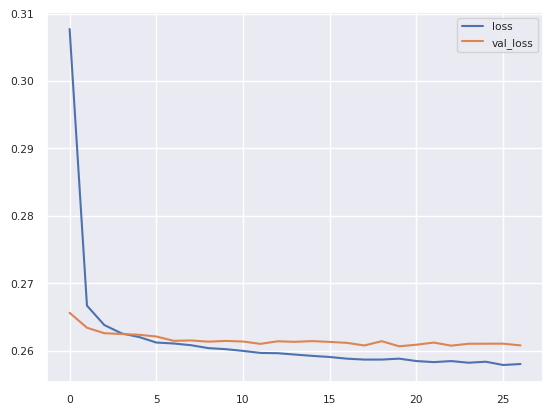

In [250]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

Judging from the loss functions trends, we obtain a good model! The loss function related to the validation data, in particular, follows the same trand as the loss function dedicated to the train dataset *without any sign of overfitting*.

For further analysis let's also create predictions from the validation dataset displayinhg a classification report and a confusion matrix for the results that we'll obtain.

In [208]:
from sklearn.metrics import confusion_matrix, classification_report

In [252]:
preds = model.predict(X_test_n)
preds = list(map(lambda x: 1 if x > 0.5 else 0, preds))

2471/2471 [==============================] - 2s 740us/step


In [253]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [254]:
print(confusion_matrix(y_test, preds))

[[ 6781  8877]
 [   62 63324]]


As we can see above we also have a quite nice model performance. Since the target labels were quite imbalanced It's not a good idea to look at the *accuracy*, because the metric refer to the correct prediction of the observation in general. Instead, we focus more on the *macro f1-score* (which is 0.77), which balances precision and recall.

### A prediction test

To conclude the project, let's try a prediction test with our neural network!

For example, given the customer below:

In [257]:
import random
random.seed(101)
random_ind = random.randint(0,len(dfpc))


new_customer = dfpc.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

Would we offer this person a loan?

In [258]:
model.predict(new_customer.values.reshape(1, 78))

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

According to the model, the customer will pay back the loan.

Now let's check in the original dataset, did this person actually end up paying it?

In [259]:
dfpc['loan_repaid'].iloc[random_ind]

1

Yes, you guessed it: the prediction is correct and the user would really do its job.